In [ ]:
# http://snap.stanford.edu/class/cs224w-2016/projects/cs224w-6-final.pdf

In [68]:
import os, sys
sys.path.append('..')
sys.path.insert(0,'../submodule/m-phate')

In [168]:
import m_phate
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook as tqdm
import scprep

In [226]:
n_nodes = 54
T = 1001

In [227]:
with open('/Users/orange3xchicken/Downloads/connectivity.txt', 'r') as f:
    connectivity = f.read().splitlines()

In [228]:
connectivity = [[float(c) for c in conn.split()] for conn in connectivity]

In [229]:
# ignore this
with open('/Users/orange3xchicken/Downloads/mote_locs.txt', 'r') as f:
    mote_locs = f.read().splitlines()

In [230]:
mote_locs = [[float(m) for m in ml.split()] for  ml in mote_locs ]

In [231]:
with open('/Users/orange3xchicken/Downloads/data.txt', 'r') as f:
    data = f.read().splitlines()

In [232]:
data = [[float(d) for d in da.split()[2:]] for  da in tqdm(data)]

In [233]:
adj = np.zeros((n_nodes, n_nodes))

In [234]:
for c in tqdm(connectivity):
    if len(c) < 3:
        continue
    else:
        adj[int(c[0])-1, int(c[1])-1] = c[2]

In [235]:
data[:5]

[[2.0, 1.0, 122.153, -3.91901, 11.04, 2.03397],
 [3.0, 1.0, 19.9884, 37.0933, 45.08, 2.69964],
 [11.0, 1.0, 19.3024, 38.4629, 45.08, 2.68742],
 [17.0, 1.0, 19.1652, 38.8039, 45.08, 2.68742],
 [18.0, 1.0, 19.175, 38.8379, 45.08, 2.69964]]

In [236]:
node_features = [[] for _ in range(n_nodes+1)]
for d in tqdm(data):
    if d[0] > T:
        continue
    try:
        node_features[int(d[1]-1)].append([d[0]] + d[2:])
    except:
        print(d)

[2.0, 56.0, 25.2314, 32.2293, 0.0402204, 2.82819]
[3.0, 56.0, 25.104, 32.3698, 0.0402204, 2.82819]
[7.0, 56.0, 24.5944, 33.0709, 0.0201102, 2.81479]
[8.0, 56.0, 24.4866, 33.2458, 0.0201102, 2.82819]
[9.0, 56.0, 24.3984, 33.4206, 0.0201102, 2.82819]
[10.0, 56.0, 24.3102, 33.5604, 0.0201102, 2.82819]
[11.0, 56.0, 24.2416, 33.7, 0.0201102, 2.82819]
[13.0, 56.0, 24.1044, 33.9442, 0.0201102, 2.81479]
[14.0, 56.0, 24.0456, 34.0487, 0.0201102, 2.82819]
[15.0, 56.0, 23.9868, 34.188, 0.0201102, 2.81479]
[16.0, 56.0, 23.9476, 34.2925, 0.0201102, 2.81479]
[17.0, 56.0, 23.9084, 34.3969, 0.92, 2.81479]
[18.0, 56.0, 23.8692, 34.536, 0.0402204, 2.82819]
[19.0, 56.0, 23.8496, 34.536, 0.0201102, 2.81479]
[20.0, 56.0, 23.8006, 34.536, 0.0201102, 2.80151]
[22.0, 56.0, 23.7614, 34.7445, 0.0402204, 2.80151]
[23.0, 56.0, 23.732, 34.8139, 0.0402204, 2.82819]
[24.0, 56.0, 23.7124, 34.8834, 0.0201102, 2.82819]
[25.0, 56.0, 23.6928, 34.9528, 0.0402204, 2.82819]
[26.0, 56.0, 23.6732, 35.0222, 0.0201102, 2.81479]

In [238]:
len(node_features[0][0])


5

In [239]:
node_data = []
for nf in tqdm(node_features):
    node_array = np.empty((T, len(node_features[0][0])-1))
    node_array[:] = np.NaN
    for ts in nf:
        for feat in ts[1:]:
            node_array[int(ts[0])-1] = feat
    mask = np.isnan(node_array).T
    idx = np.where(~mask,np.arange(mask.shape[1]),0)
    np.maximum.accumulate(idx, axis=1, out=idx)
    out = node_array.T[np.arange(idx.shape[0])[:,None], idx]
    out = np.nan_to_num(out,0).T
    node_data.append(out)

In [240]:
data = np.stack(node_data, axis=0)
X_tr= data

In [280]:
X_tr.shape

(55, 1001, 4)

In [283]:
X_tr = X_tr.transpose(1,0,2)

In [301]:
X_tr.shape

(1001, 55, 4)

In [303]:
np.cumsum(np.random.normal(0, 1, (100, 10, 5)), axis=0).shape

(100, 10, 5)

In [342]:
m_phate_op = m_phate.M_PHATE(normalize=False, n_components=2, n_jobs=-2, intraslice_knn=10,interslice_knn=25)
m_phate_data = m_phate_op.fit_transform(X_tr)

Calculating M-PHATE...
  Calculating multislice kernel...
  Calculated multislice kernel in 19.62 seconds.
  Calculating graph and diffusion operator...
    Calculating landmark operator...
      Calculating SVD...
      Calculated SVD in 35.85 seconds.
      Calculating KMeans...
      Calculated KMeans in 56.22 seconds.
    Calculated landmark operator in 96.88 seconds.
  Calculated graph and diffusion operator in 99.04 seconds.
  Running PHATE on precomputed affinity matrix with 55055 cells.
  Calculating optimal t...
  Calculated optimal t in 14.69 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 7.71 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 95.52 seconds.
Calculated M-PHATE in 236.62 seconds.


In [343]:
adj.shape

(54, 54)

In [344]:
np.isin(np.arange(n_nodes+1),[11,30,50])

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False])

In [351]:
#nodeid = np.tile(np.arange(n_nodes+1), T)
nodeid = np.tile(np.isin(np.arange(n_nodes+1),[11,30,49]), T)
#nodeid = np.repeat(np.arange(T), n_nodes+1)

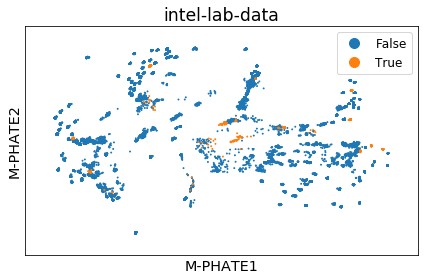

In [352]:
scprep.plot.scatter2d(m_phate_data, c=nodeid, ticks=False, title='intel-lab-data', label_prefix="M-PHATE",filename=None)